In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
turnover_csv = df = 'D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 02/Data/general_main.csv'
df = pd.read_csv(turnover_csv, index_col = 'id')

In [3]:
df.head()

,age,gender,education,edu_field,marital_status,distance_home,attrition,department,travel,job_level,...,no_companies_worked,tot_working_years,hrs_worked,total absent,overtime,job_involvement,performance,environment_satisfaction,job_satisfaction,work_life_balance
id,,,,,,,,,,,,,,,,,,,,,
1,51,Female,2,Life Sciences,Married,6,No,Sales,Travel Rarely,1,...,1,1,1710.800000,27,No,3,3,3,4,2
2,31,Female,1,Life Sciences,Single,10,Yes,Research & Development,Travel Frequently,1,...,0,6,1821.383333,15,No,2,4,3,2,4
3,32,Male,4,Other,Married,17,No,Research & Development,Travel Frequently,4,...,1,5,1697.266667,0,No,3,3,2,2,1
4,38,Male,5,Life Sciences,Married,2,No,Research & Development,Non Travel,3,...,3,13,1690.466667,18,No,2,3,4,4,3
5,32,Male,1,Medical,Single,10,No,Research & Development,Travel Rarely,1,...,4,9,1961.533333,0,No,3,3,4,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       4410 non-null   int64  
 1   gender                    4410 non-null   object 
 2   education                 4410 non-null   int64  
 3   edu_field                 4410 non-null   object 
 4   marital_status            4410 non-null   object 
 5   distance_home             4410 non-null   int64  
 6   attrition                 4410 non-null   object 
 7   department                4410 non-null   object 
 8   travel                    4410 non-null   object 
 9   job_level                 4410 non-null   int64  
 10  job_role                  4410 non-null   object 
 11  std_hours                 4410 non-null   int64  
 12  mon_income                4410 non-null   int64  
 13  median_compensation       4410 non-null   int64  
 14  compensa

In [5]:
df.shape

(4410, 32)

In [6]:
df.columns

Index(['age', 'gender', 'education', 'edu_field', 'marital_status',
       'distance_home', 'attrition', 'department', 'travel', 'job_level',
       'job_role', 'std_hours', 'mon_income', 'median_compensation',
       'compensation_ratio', 'compensation_level', 'salary_hike',
       'stockoption_level', 'years_last_promotion', 'training_time',
       'years_curr_manager', 'years_company', 'no_companies_worked',
       'tot_working_years', 'hrs_worked', 'total absent', 'overtime',
       'job_involvement', 'performance', 'environment_satisfaction',
       'job_satisfaction', 'work_life_balance'],
      dtype='object')

In [7]:
df.isnull().sum()

age                         0
gender                      0
education                   0
edu_field                   0
marital_status              0
distance_home               0
attrition                   0
department                  0
travel                      0
job_level                   0
job_role                    0
std_hours                   0
mon_income                  0
median_compensation         0
compensation_ratio          0
compensation_level          0
salary_hike                 0
stockoption_level           0
years_last_promotion        0
training_time               0
years_curr_manager          0
years_company               0
no_companies_worked         0
tot_working_years           0
hrs_worked                  0
total absent                0
overtime                    0
job_involvement             0
performance                 0
environment_satisfaction    0
job_satisfaction            0
work_life_balance           0
dtype: int64

In [8]:
df.attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: attrition, dtype: float64

In [9]:
df.gender.value_counts()

Male      2646
Female    1764
Name: gender, dtype: int64

In [10]:
df.edu_field.value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: edu_field, dtype: int64

In [11]:
df.marital_status.value_counts()

Married     2019
Single      1410
Divorced     981
Name: marital_status, dtype: int64

In [12]:
df.department.value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: department, dtype: int64

In [13]:
df.job_role.value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: job_role, dtype: int64

In [14]:
df.compensation_level.value_counts()

Below average    2097
Average          1191
Above average    1122
Name: compensation_level, dtype: int64

In [15]:
df.travel.value_counts()

Travel Rarely        3129
Travel Frequently     831
Non Travel            450
Name: travel, dtype: int64

In [16]:
df.overtime.value_counts()

No     3341
Yes    1069
Name: overtime, dtype: int64

## Ordinal Encoding using Labels

In [17]:
# encode attrition
attrition_dict = {'Yes':1, 'No':0}
df['attrition'] = df.attrition.map(attrition_dict)

# encode travel
travel_dict = {'Non Travel':1, 'Travel Rarely':2, 'Travel Frequently':3}
df['travel'] = df.travel.map(travel_dict)

# encode compensation level
comp_dict = {'Below average':1, 'Average':2, 'Above average':3}
df['compensation_level'] = df.compensation_level.map(comp_dict)

# encode overtime
overtime_dict = {'No':1, 'Yes':2}
df['overtime'] = df.overtime.map(overtime_dict)

In [18]:
df.head(3)

,age,gender,education,edu_field,marital_status,distance_home,attrition,department,travel,job_level,...,no_companies_worked,tot_working_years,hrs_worked,total absent,overtime,job_involvement,performance,environment_satisfaction,job_satisfaction,work_life_balance
id,,,,,,,,,,,,,,,,,,,,,
1,51,Female,2,Life Sciences,Married,6,0,Sales,2,1,...,1,1,1710.800000,27,1,3,3,3,4,2
2,31,Female,1,Life Sciences,Single,10,1,Research & Development,3,1,...,0,6,1821.383333,15,1,2,4,3,2,4
3,32,Male,4,Other,Married,17,0,Research & Development,3,4,...,1,5,1697.266667,0,1,3,3,2,2,1


## Cardinal Encoding using Frequency

In [19]:
# encode gender
gender_dict = df['gender'].value_counts(normalize=True).to_dict()
df['gender'] = df.gender.map(gender_dict)

# encode education field
edu_dict = df['edu_field'].value_counts(normalize=True).to_dict()
df['edu_field'] = df.edu_field.map(edu_dict)

# encode marital status
marital_dict = df['marital_status'].value_counts(normalize=True).to_dict()
df['marital_status'] = df.marital_status.map(marital_dict)

# encode department
dept_dict = df['department'].value_counts(normalize=True).to_dict()
df['department'] = df.department.map(dept_dict)

# encode job role
job_dict = df['job_role'].value_counts(normalize=True).to_dict()
df['job_role'] = df.job_role.map(job_dict)

df.head()

,age,gender,education,edu_field,marital_status,distance_home,attrition,department,travel,job_level,...,no_companies_worked,tot_working_years,hrs_worked,total absent,overtime,job_involvement,performance,environment_satisfaction,job_satisfaction,work_life_balance
id,,,,,,,,,,,,,,,,,,,,,
1,51,0.4,2,0.412245,0.457823,6,0,0.303401,2,1,...,1,1,1710.800000,27,1,3,3,3,4,2
2,31,0.4,1,0.412245,0.319728,10,1,0.653741,3,1,...,0,6,1821.383333,15,1,2,4,3,2,4
3,32,0.6,4,0.055782,0.457823,17,0,0.653741,3,4,...,1,5,1697.266667,0,1,3,3,2,2,1
4,38,0.6,5,0.412245,0.457823,2,0,0.653741,1,3,...,3,13,1690.466667,18,1,2,3,4,4,3
5,32,0.6,1,0.315646,0.319728,10,0,0.653741,2,1,...,4,9,1961.533333,0,1,3,3,4,1,3


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4410.0,36.923810,9.133301,18.000000,30.000000,36.000000,43.000000,60.000000
gender,4410.0,0.520000,0.097991,0.400000,0.400000,0.600000,0.600000,0.600000
education,4410.0,2.912925,1.023933,1.000000,2.000000,3.000000,4.000000,5.000000
edu_field,4410.0,0.292790,0.133997,0.018367,0.108163,0.315646,0.412245,0.412245
marital_status,4410.0,0.361311,0.095440,0.222449,0.319728,0.319728,0.457823,0.457823
distance_home,4410.0,9.192517,8.105026,1.000000,2.000000,7.000000,14.000000,29.000000
attrition,4410.0,0.161224,0.367780,0.000000,0.000000,0.000000,0.000000,1.000000
department,4410.0,0.521267,0.188921,0.042857,0.303401,0.653741,0.653741,0.653741
travel,4410.0,2.086395,0.532049,1.000000,2.000000,2.000000,2.000000,3.000000
job_level,4410.0,2.063946,1.106689,1.000000,1.000000,2.000000,3.000000,5.000000


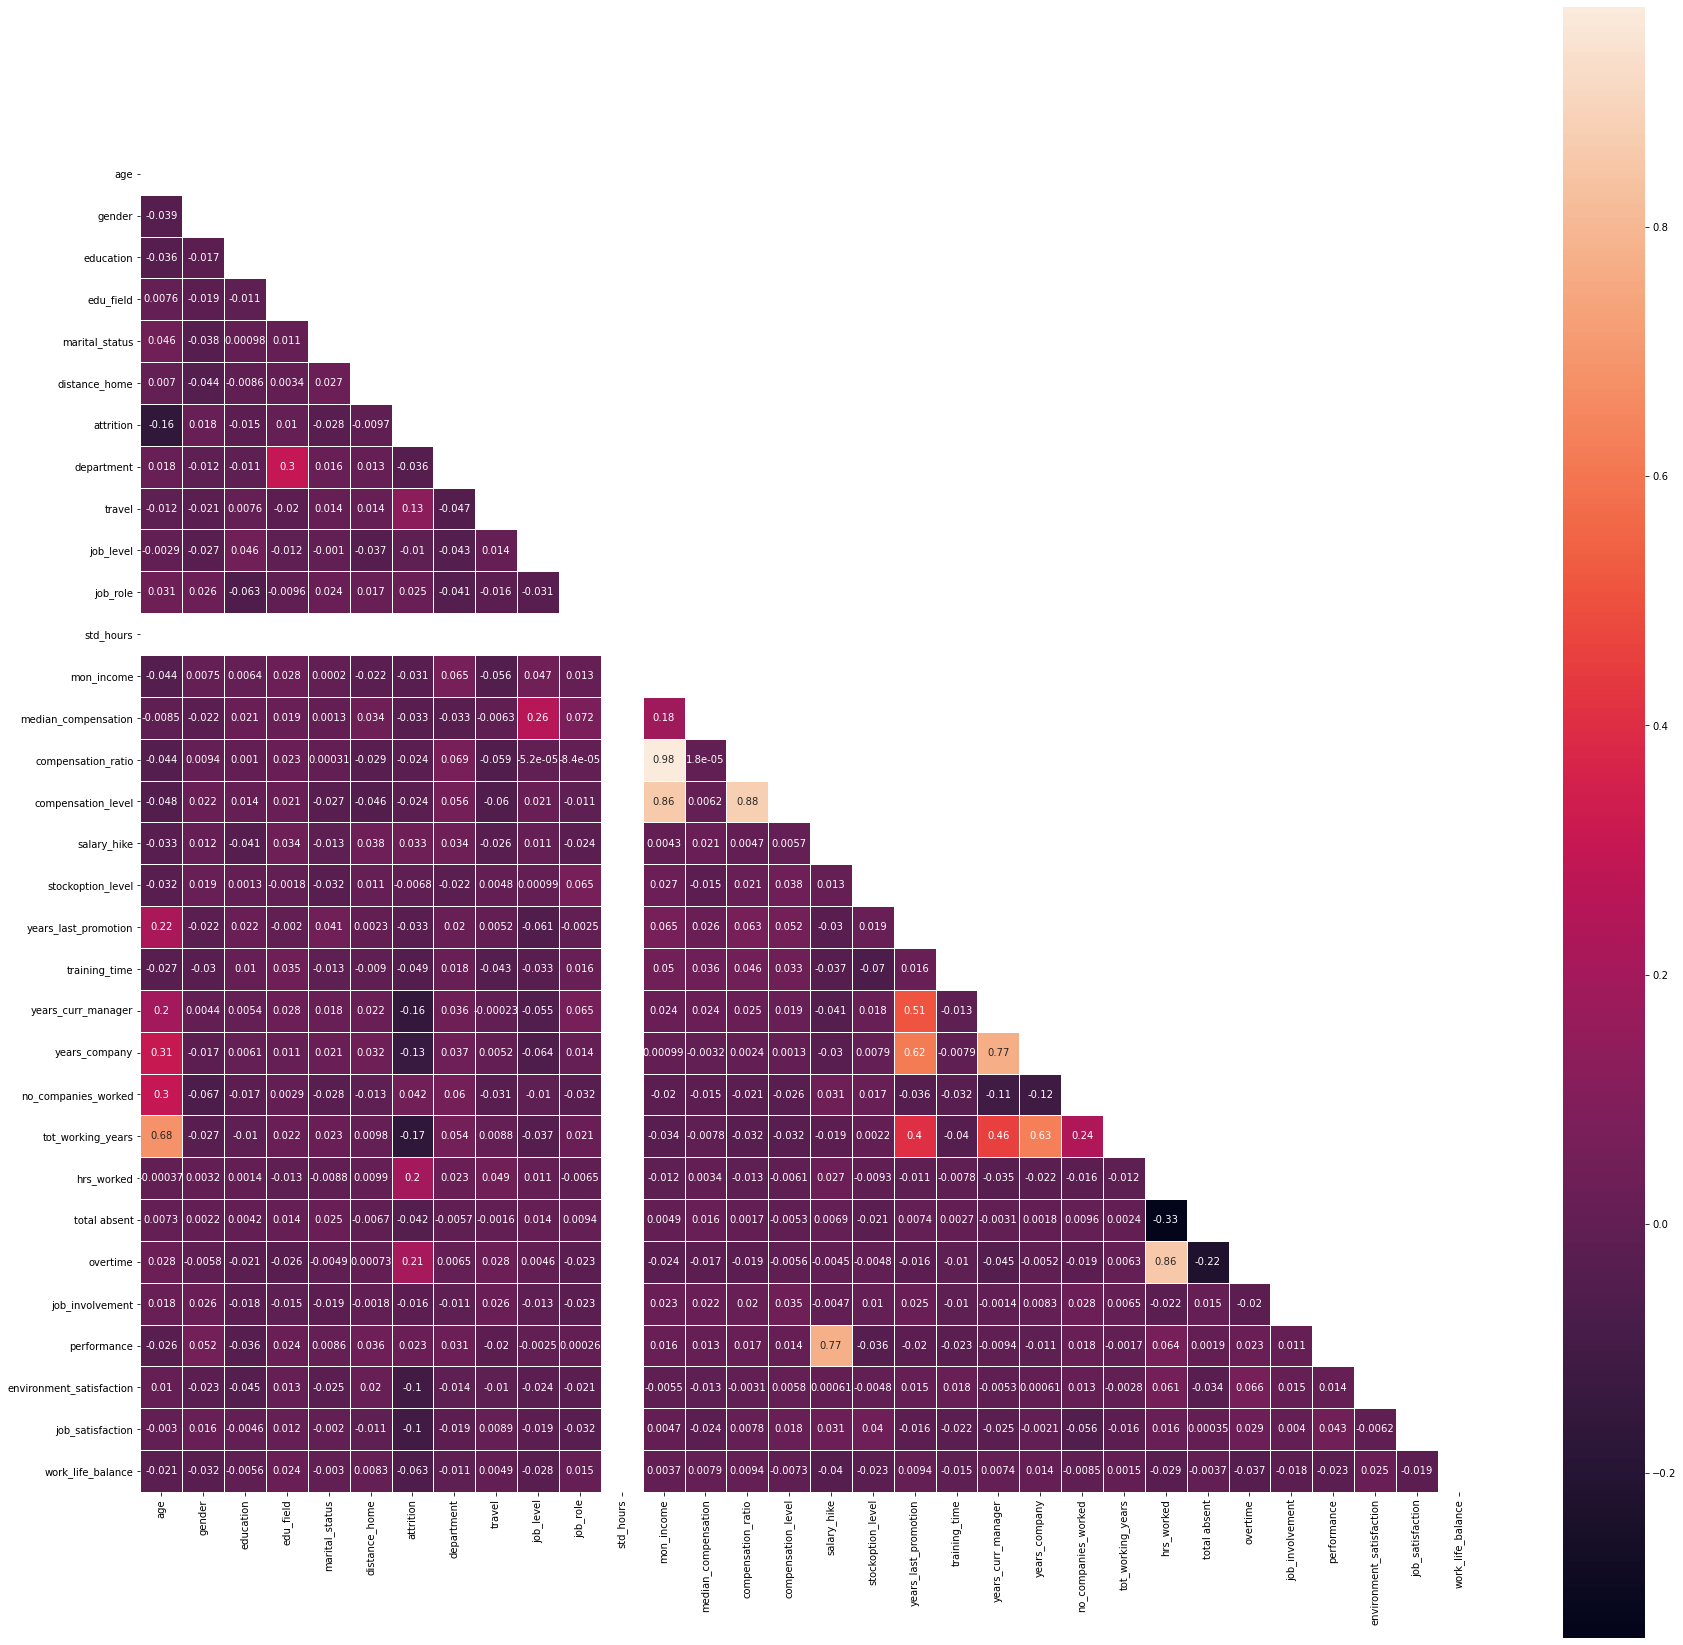

In [21]:
# Correlation Matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(corr_matrix, annot=True, mask=mask, square=True, linewidths=.5)
plt.show()

In [22]:
df = df.drop(['std_hours'], axis=1)

In [23]:
df.shape

(4410, 31)

In [24]:
df.columns

Index(['age', 'gender', 'education', 'edu_field', 'marital_status',
       'distance_home', 'attrition', 'department', 'travel', 'job_level',
       'job_role', 'mon_income', 'median_compensation', 'compensation_ratio',
       'compensation_level', 'salary_hike', 'stockoption_level',
       'years_last_promotion', 'training_time', 'years_curr_manager',
       'years_company', 'no_companies_worked', 'tot_working_years',
       'hrs_worked', 'total absent', 'overtime', 'job_involvement',
       'performance', 'environment_satisfaction', 'job_satisfaction',
       'work_life_balance'],
      dtype='object')

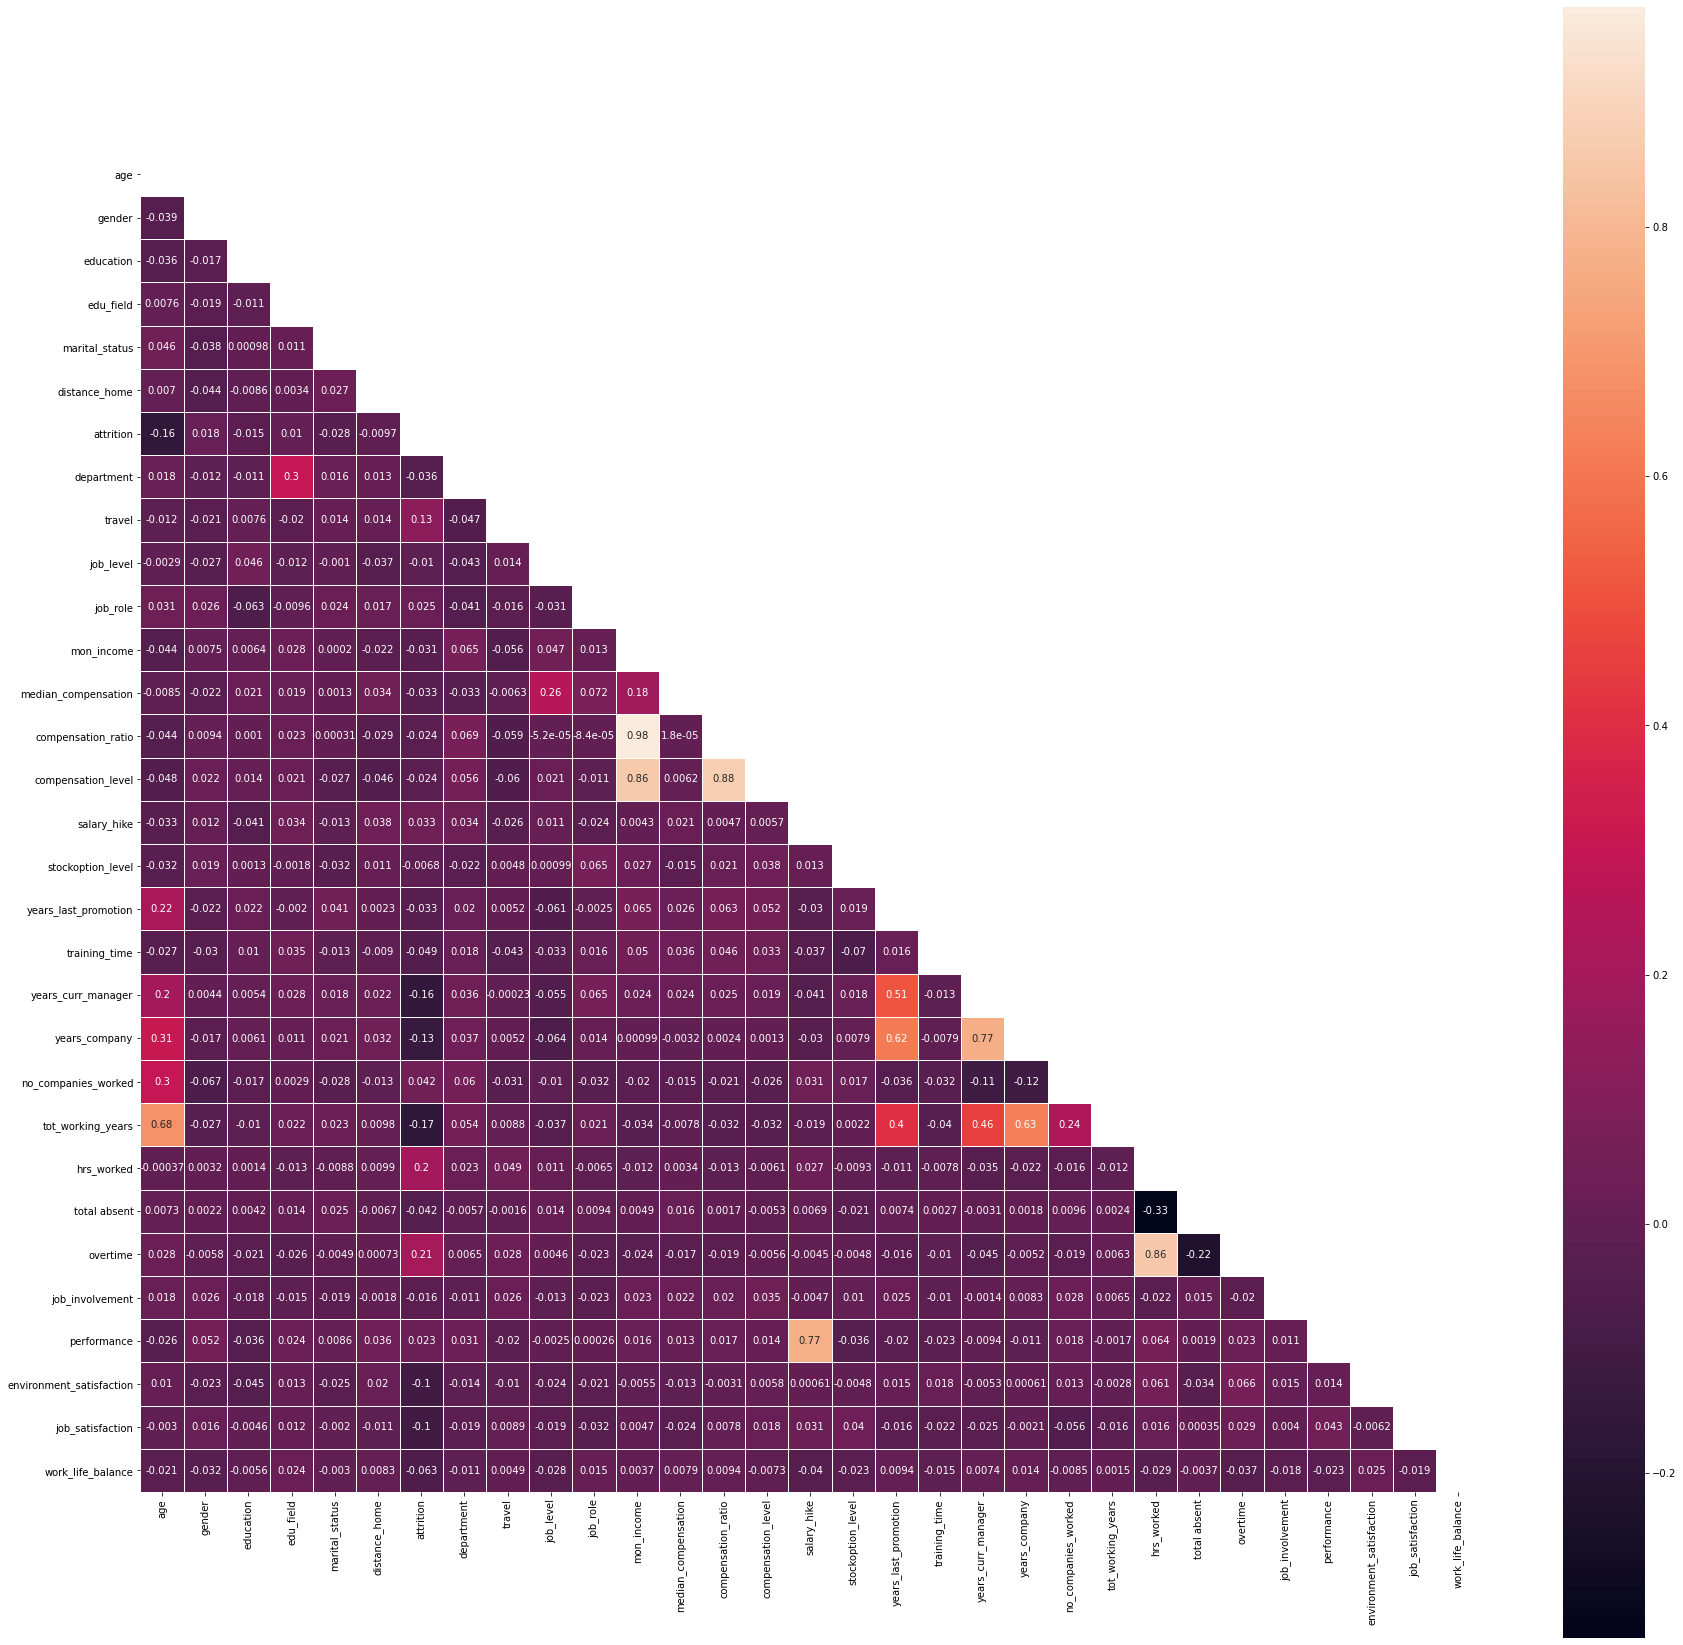

In [25]:
# Correlation Matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(corr_matrix, annot=True, mask=mask, square=True, linewidths=.5)
plt.show()

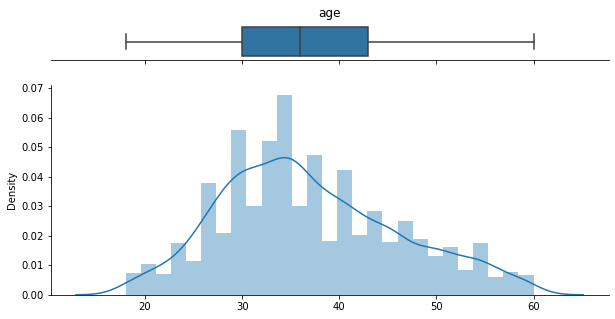

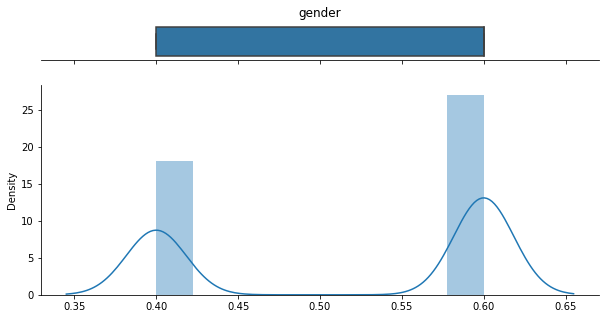

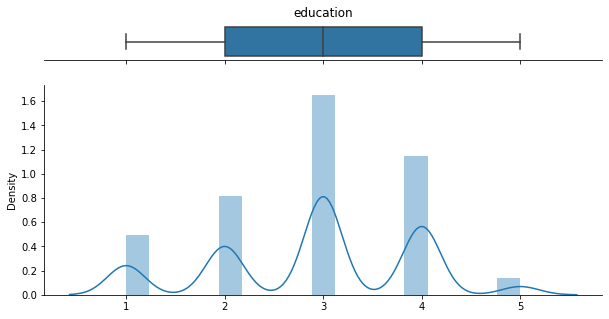

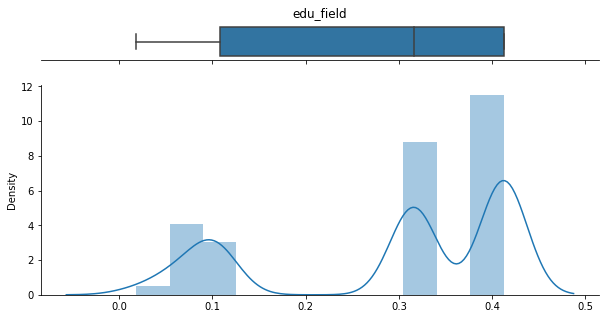

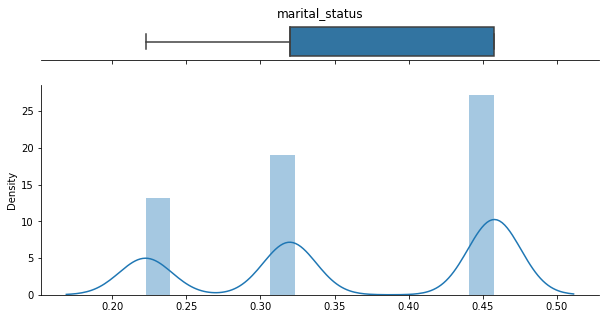

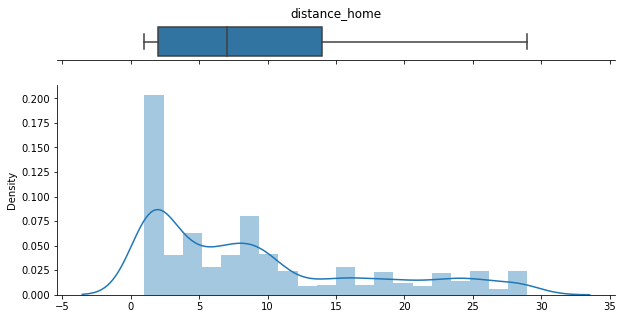

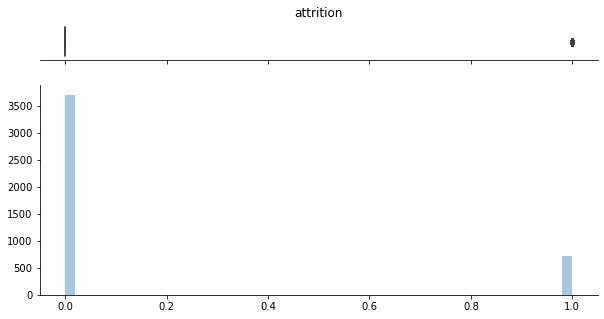

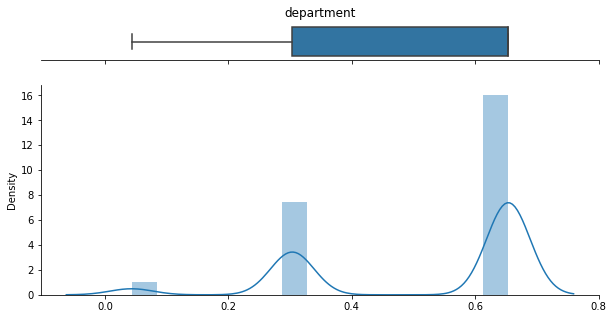

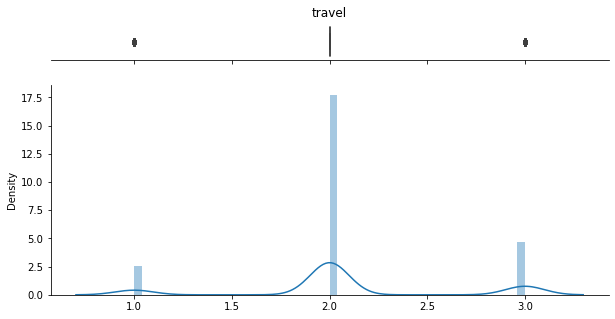

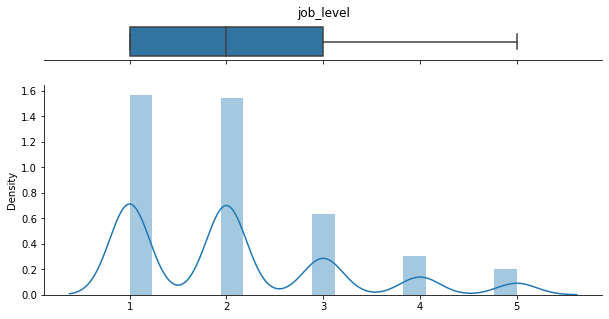

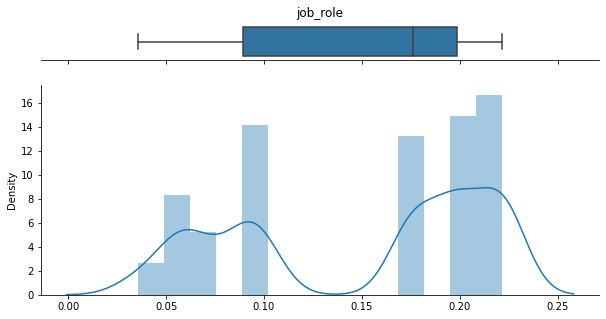

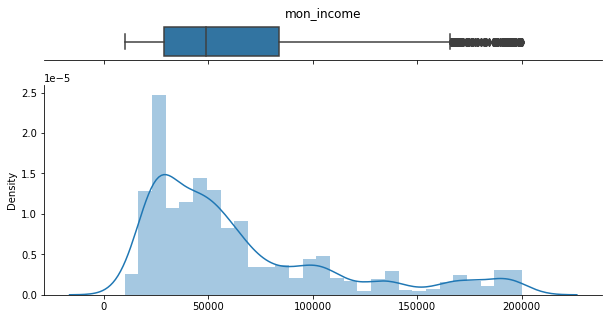

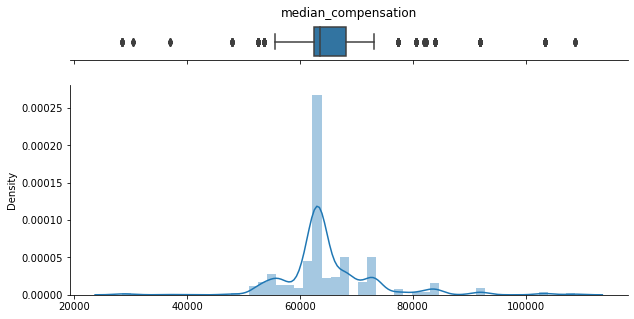

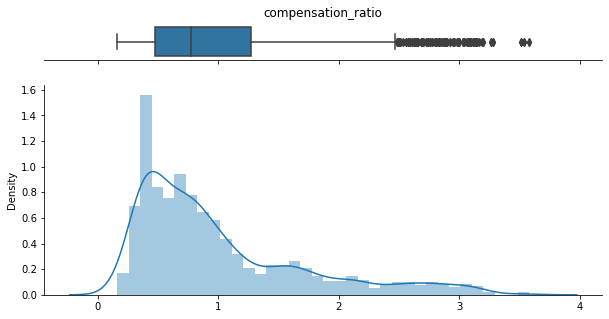

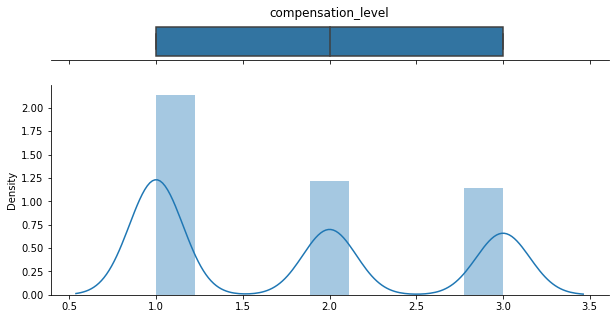

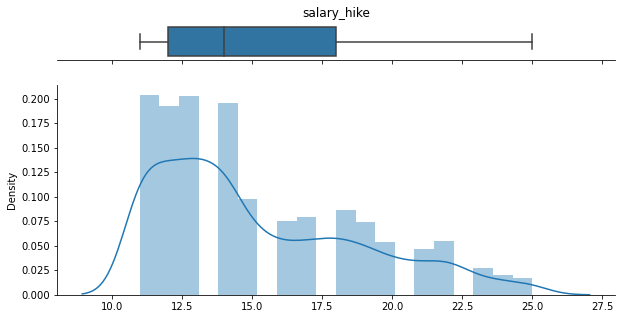

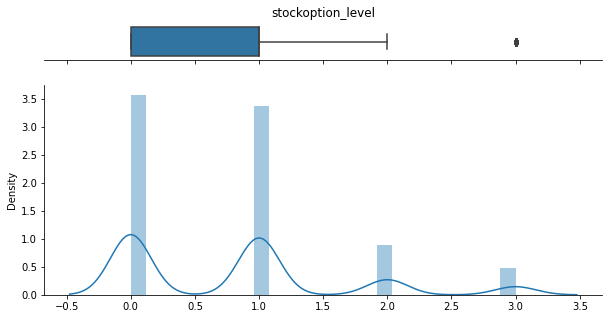

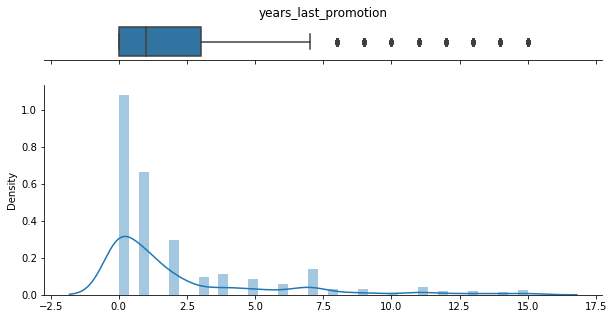

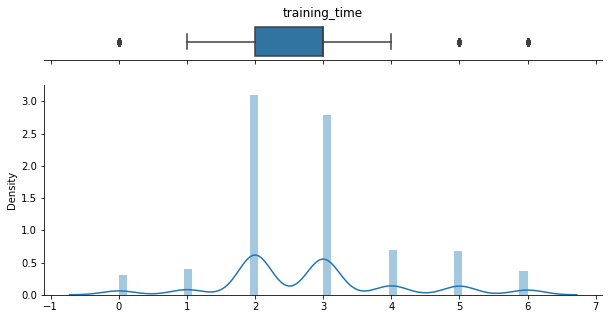

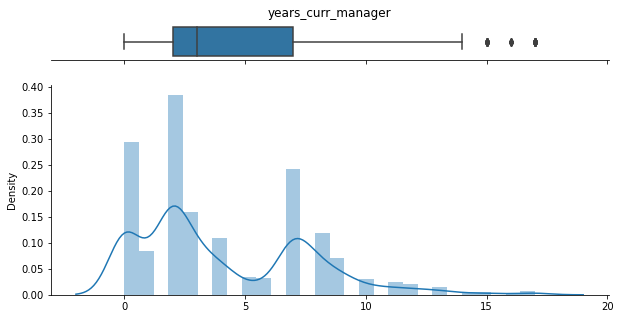

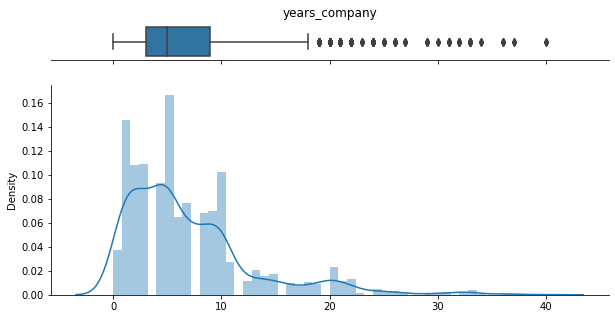

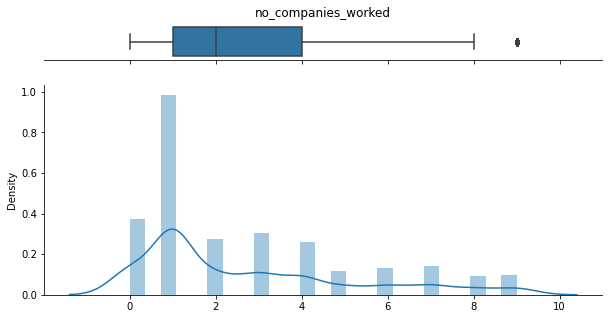

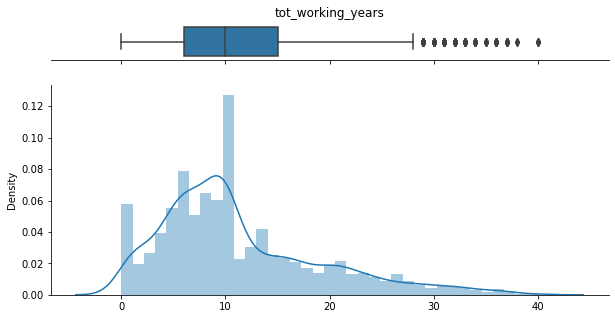

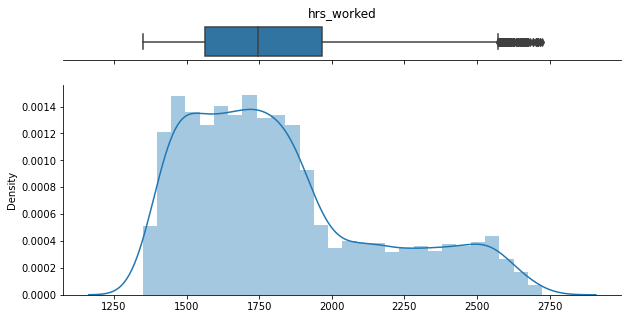

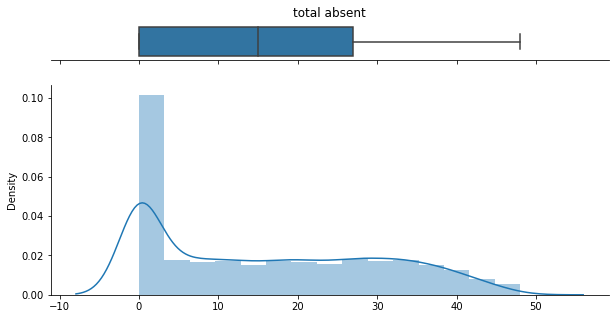

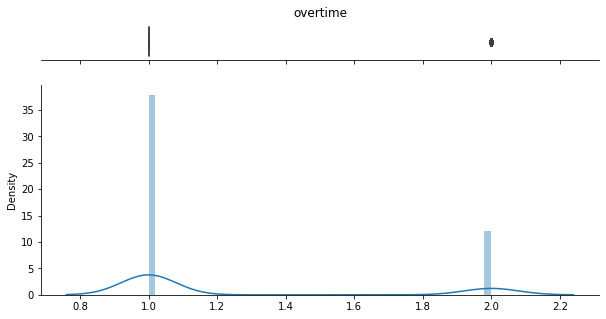

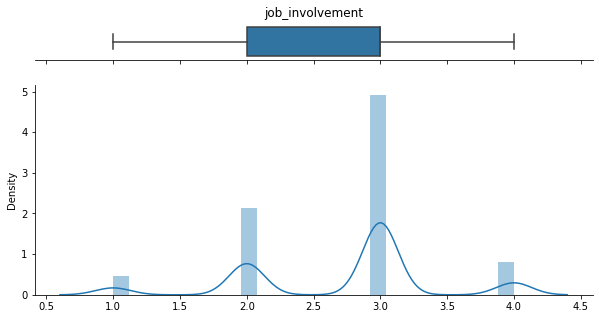

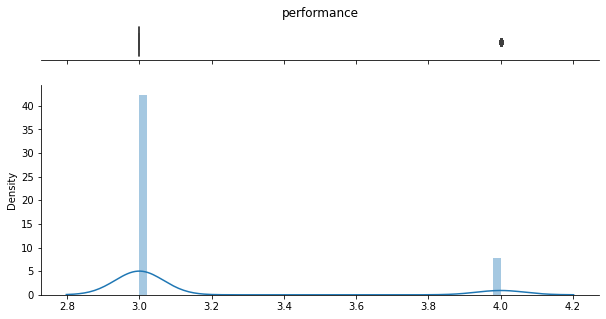

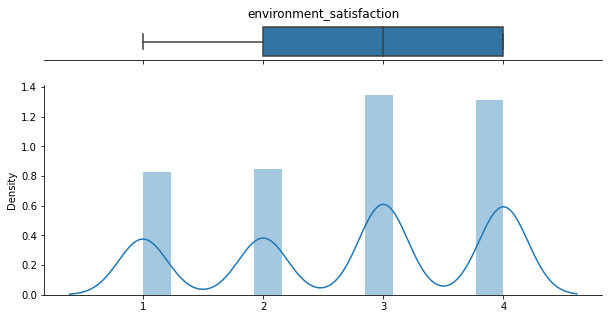

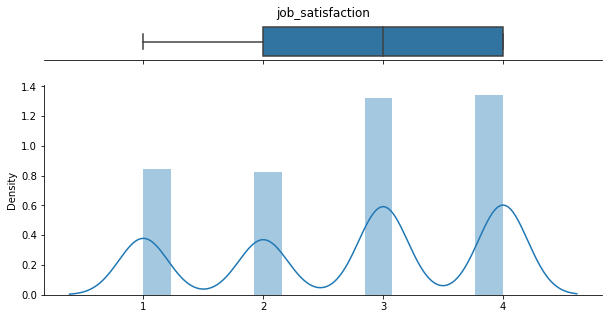

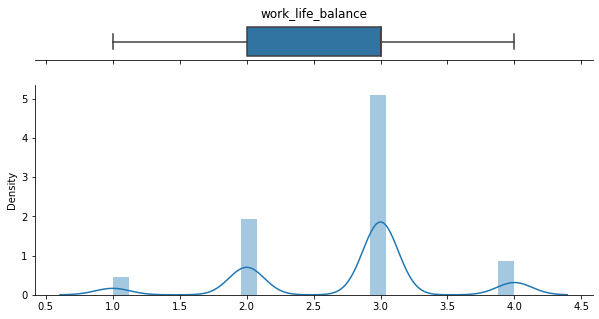

In [26]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'attrition':       
        ax_hist = sns.distplot(df[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(df[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        

plt.show()

## Train-test-split

In [27]:
# Create  predictor and target variables

target = 'attrition'
features = [c for c in df.columns if c != 'attrition']

y = df[target]
X = df[features]

In [28]:
y.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: attrition, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 40, stratify= y)

## Scale data

In [30]:
# Using robust scaler on Xtrain and transform on Xtest

scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [31]:
Xtrain_rs = scaler.transform(X_train)
Xtest_rs = scaler.transform(X_test)

## Balance dataset

In [32]:
# Using SMOTE for oversampling of Xtrain scaled and ytrain
smote = SMOTE()

# fit predictor and target variable
Xtrain_rus, ytrain_rus = smote.fit_resample(Xtrain_rs, y_train)

print(f'Original shape: {Counter(y_train)}')
print(f'Resampled shape: {Counter(ytrain_rus)}')

Original shape: Counter({0: 2589, 1: 498})
Resampled shape: Counter({0: 2589, 1: 2589})


In [53]:
Xtrain_rus.shape

(5178, 30)

In [34]:
ytrain_rus

0       0
1       0
2       0
3       1
4       0
       ..
5173    1
5174    1
5175    1
5176    1
5177    1
Name: attrition, Length: 5178, dtype: int64

## Models
### 1. Logistic Regression

In [35]:
cv = KFold(n_splits = 10)

lr_model = LogisticRegression(random_state=50)

lr_model.fit(Xtrain_rus, ytrain_rus)
score_lr = cross_val_score(lr_model, Xtrain_rus, ytrain_rus, cv=cv, n_jobs=-1)
print('Mean: %.3f' % np.mean(score_lr))

Mean: 0.720


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1110
           1       0.35      0.70      0.47       213

    accuracy                           0.74      1323
   macro avg       0.64      0.73      0.65      1323
weighted avg       0.84      0.74      0.77      1323



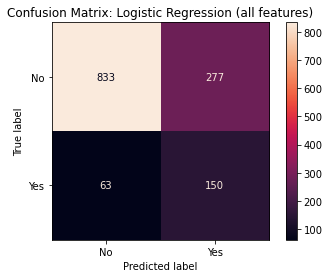

In [36]:
y_pred_lr = lr_model.predict(Xtest_rs)

ac = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_lr))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(lr_model, Xtest_rs, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: Logistic Regression (all features)')
plt.show()

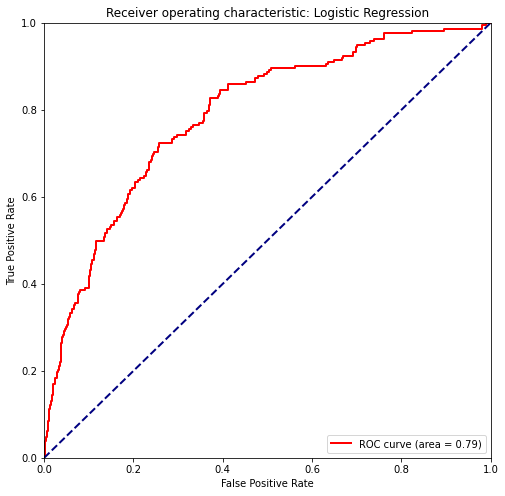

In [37]:
pred_prob_lr = lr_model.predict_proba(Xtest_rs)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, pred_prob_lr)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Logistic Regression')
plt.legend(loc = "lower right")
plt.show()

### 2. KNN Neighbour

In [38]:
cv = KFold(n_splits = 10)

knn_model = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(Xtrain_rus))), weights='distance')

knn_model.fit(Xtrain_rus, ytrain_rus)
score_knn = cross_val_score(knn_model, Xtrain_rus, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_knn))

Mean: 0.806


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1110
           1       0.40      0.94      0.56       213

    accuracy                           0.76      1323
   macro avg       0.69      0.83      0.70      1323
weighted avg       0.89      0.76      0.79      1323



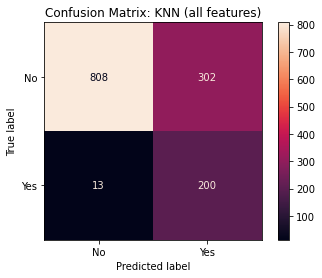

In [39]:
y_pred_knn = knn_model.predict(Xtest_rs)

ac = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_knn))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(knn_model, Xtest_rs, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: KNN (all features)')
plt.show()

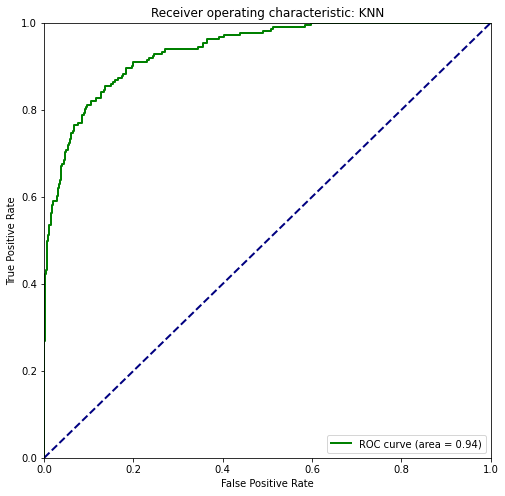

In [40]:
pred_prob_knn = knn_model.predict_proba(Xtest_rs)[:,1]

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, pred_prob_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_knn, tpr_knn, color='green', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: KNN')
plt.legend(loc = "lower right")
plt.show()

### 3.Support Vector Machine

In [41]:
cv = KFold(n_splits = 10)

svm_model = SVC(kernel='rbf', probability=True, random_state=50)

svm_model.fit(Xtrain_rus, ytrain_rus)
score_svm = cross_val_score(svm_model, Xtrain_rus, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_svm))

Mean: 0.950


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1110
           1       0.70      0.85      0.77       213

    accuracy                           0.92      1323
   macro avg       0.84      0.89      0.86      1323
weighted avg       0.93      0.92      0.92      1323



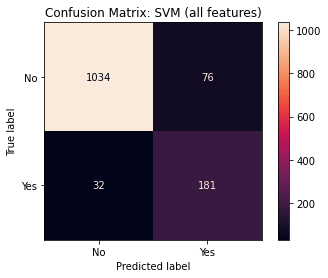

In [42]:
y_pred_svm = svm_model.predict(Xtest_rs)

ac = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_svm))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(svm_model, Xtest_rs, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: SVM (all features)')
plt.show()

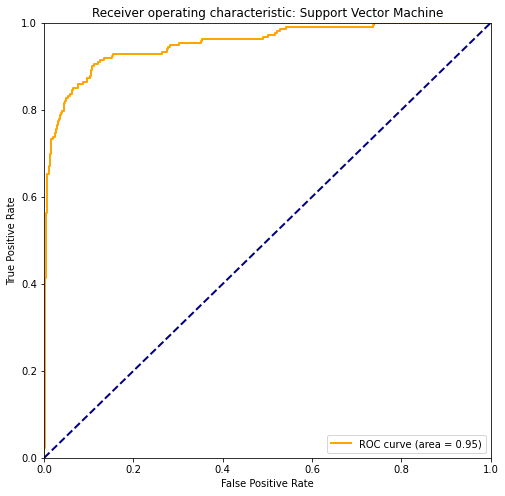

In [43]:
pred_prob_svm = svm_model.predict_proba(Xtest_rs)[:,1]

fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, pred_prob_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_svm, tpr_svm, color='orange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Support Vector Machine')
plt.legend(loc = "lower right")
plt.show()

### 4. Naive Bayes

In [44]:
cv = KFold(n_splits = 10)

nb_model = GaussianNB(var_smoothing=2.848035868435799e-08)

nb_model.fit(Xtrain_rus, ytrain_rus)
score_nb = cross_val_score(nb_model, Xtrain_rus, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_nb))

Mean: 0.688


Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1110
           1       0.27      0.63      0.37       213

    accuracy                           0.66      1323
   macro avg       0.58      0.65      0.57      1323
weighted avg       0.80      0.66      0.70      1323



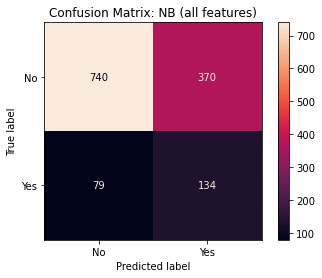

In [45]:
y_pred_nb = nb_model.predict(Xtest_rs)

ac = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_nb))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(nb_model, Xtest_rs, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: NB (all features)')
plt.show()

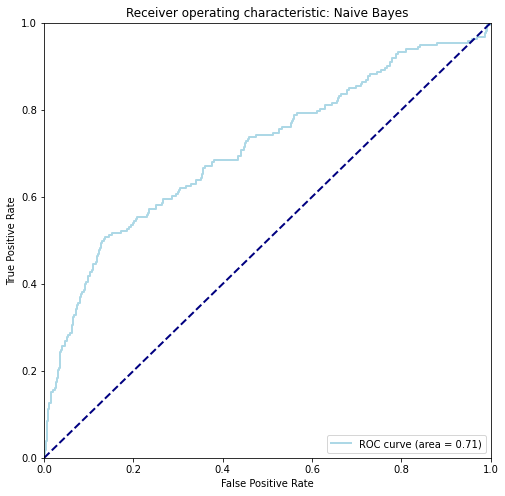

In [46]:
pred_prob_nb = nb_model.predict_proba(Xtest_rs)[:,1]

fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, pred_prob_nb)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_nb, tpr_nb, color='lightblue', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Naive Bayes')
plt.legend(loc = "lower right")
plt.show()

### 5. Random Forest

In [52]:
cv = KFold(n_splits = 10)

rf_model = RandomForestClassifier(oob_score=True, max_features=None, random_state=50)

rf_model.fit(Xtrain_rus, ytrain_rus)
score_rf = cross_val_score(rf_model, Xtrain_rus, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_rf))

Mean: 0.984


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1110
           1       0.96      0.85      0.91       213

    accuracy                           0.97      1323
   macro avg       0.97      0.92      0.94      1323
weighted avg       0.97      0.97      0.97      1323



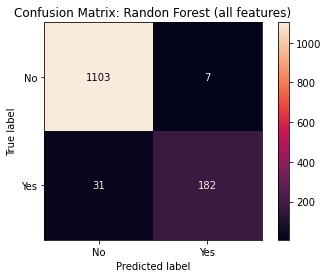

In [53]:
y_pred_rf = rf_model.predict(Xtest_rs)

ac = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_rf))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(rf_model, Xtest_rs, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: Randon Forest (all features)')
plt.show()

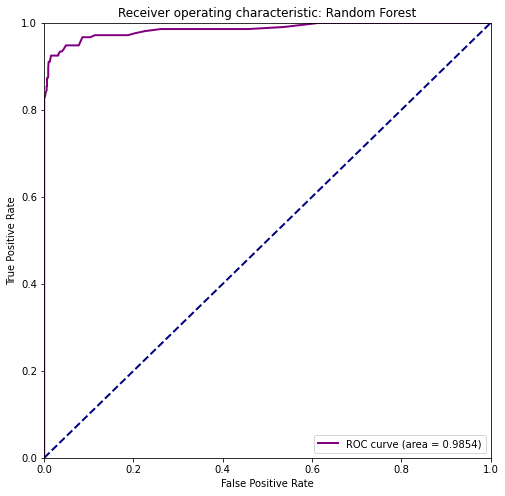

In [54]:
pred_prob_rf = rf_model.predict_proba(Xtest_rs)[:,1]

fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, pred_prob_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_rf, tpr_rf, color='purple', lw = lw, label = 'ROC curve (area = %0.4f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Random Forest')
plt.legend(loc = "lower right")
plt.show()

## Feature selection

In [55]:
# Feature Selection
fea_imp = pd.DataFrame(list(zip(features, rf_model.feature_importances_)), columns=['importance', 'values'])
fea_imp.sort_values(by='values', ascending=False)

,importance,values
24,overtime,0.120320
0,age,0.089273
28,job_satisfaction,0.062586
19,years_company,0.052585
4,marital_status,0.048743
21,tot_working_years,0.044723
27,environment_satisfaction,0.043885
18,years_curr_manager,0.042722
20,no_companies_worked,0.038782
1,gender,0.037957


In [62]:
# Create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.03

sfm = SelectFromModel(rf_model, threshold=0.03)
sfm.fit(Xtrain_rus, ytrain_rus)

SelectFromModel(estimator=RandomForestClassifier(max_features=None,
                                                 oob_score=True,
                                                 random_state=50),
                threshold=0.03)

In [63]:
for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

age
gender
edu_field
marital_status
distance_home
median_compensation
salary_hike
years_curr_manager
years_company
no_companies_worked
tot_working_years
hrs_worked
overtime
environment_satisfaction
job_satisfaction


In [64]:
# Transform the data to create a new dataset containing only the most important features
X_imp_train = sfm.transform(Xtrain_rus)
X_imp_test = sfm.transform(Xtest_rs)

## New models
### 1. Random Forest

In [65]:
cv = KFold(n_splits = 10)

rf_model_imp = RandomForestClassifier(oob_score=True, max_features=None, random_state=50)

rf_model_imp.fit(X_imp_train, ytrain_rus)
score_rf_imp = cross_val_score(rf_model_imp, X_imp_train, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_rf_imp))

Mean: 0.980


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1110
           1       0.99      0.89      0.94       213

    accuracy                           0.98      1323
   macro avg       0.99      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323



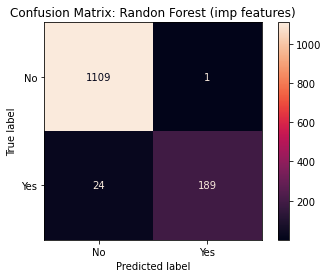

In [66]:
y_pred_rf_imp = rf_model_imp.predict(X_imp_test)

ac = accuracy_score(y_test, y_pred_rf_imp)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_rf_imp))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(rf_model_imp, X_imp_test, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: Randon Forest (imp features)')
plt.show()

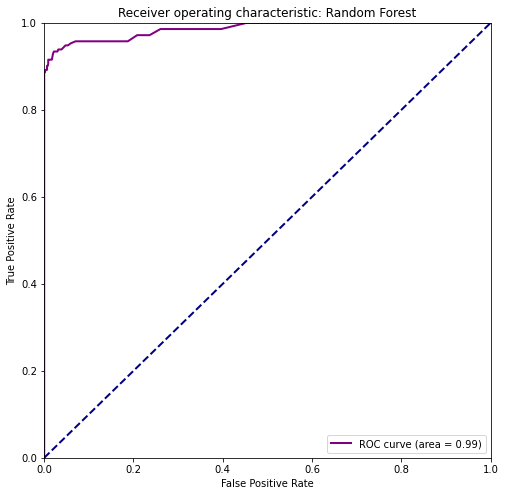

In [67]:
pred_prob_rf_imp = rf_model_imp.predict_proba(X_imp_test)[:,1]

fpr_rf1, tpr_rf1, _ = metrics.roc_curve(y_test, pred_prob_rf_imp)
roc_auc_rf1 = metrics.auc(fpr_rf1, tpr_rf1)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_rf1, tpr_rf1, color='purple', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_rf1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Random Forest')
plt.legend(loc = "lower right")
plt.show()

### 2. Logistic Regression

In [68]:
cv = KFold(n_splits = 10)

lr_model_imp = LogisticRegression(random_state=50)

lr_model_imp.fit(X_imp_train, ytrain_rus)
score_lr_imp = cross_val_score(lr_model_imp, X_imp_train, ytrain_rus, cv=cv, n_jobs=-1)
print('Mean: %.3f' % np.mean(score_lr_imp))

Mean: 0.685


Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1110
           1       0.31      0.67      0.42       213

    accuracy                           0.71      1323
   macro avg       0.61      0.69      0.61      1323
weighted avg       0.82      0.71      0.74      1323



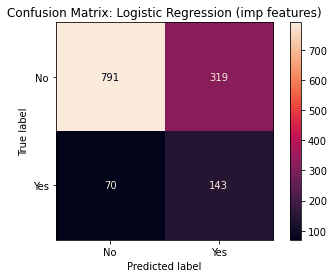

In [69]:
y_pred_lr_imp = lr_model_imp.predict(X_imp_test)

ac = accuracy_score(y_test, y_pred_lr_imp)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_lr_imp))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(lr_model_imp, X_imp_test, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: Logistic Regression (imp features)')
plt.show()

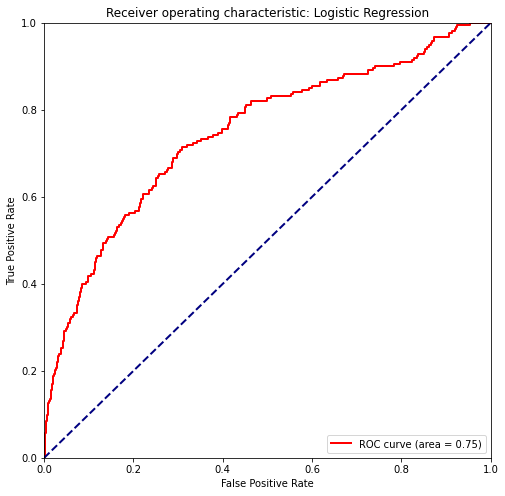

In [70]:
pred_prob_lr_imp = lr_model_imp.predict_proba(X_imp_test)[:,1]

fpr1, tpr1, _ = metrics.roc_curve(y_test, pred_prob_lr_imp)
roc_auc_lr1 = metrics.auc(fpr1, tpr1)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr1, tpr1, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_lr1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Logistic Regression')
plt.legend(loc = "lower right")
plt.show()

## 3. KNN

In [72]:
cv = KFold(n_splits = 10)

knn_model_imp = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(Xtrain_rus))), weights='distance')

knn_model_imp.fit(X_imp_train, ytrain_rus)
score_knn_imp = cross_val_score(knn_model_imp, X_imp_train, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_knn_imp))

Mean: 0.877


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1110
           1       0.55      0.94      0.69       213

    accuracy                           0.87      1323
   macro avg       0.77      0.90      0.80      1323
weighted avg       0.92      0.87      0.88      1323



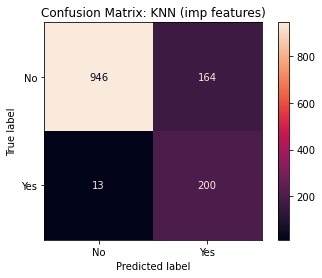

In [73]:
y_pred_knn_imp = knn_model_imp.predict(X_imp_test)

ac = accuracy_score(y_test, y_pred_knn_imp)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_knn_imp))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(knn_model_imp, X_imp_test, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: KNN (imp features)')
plt.show()

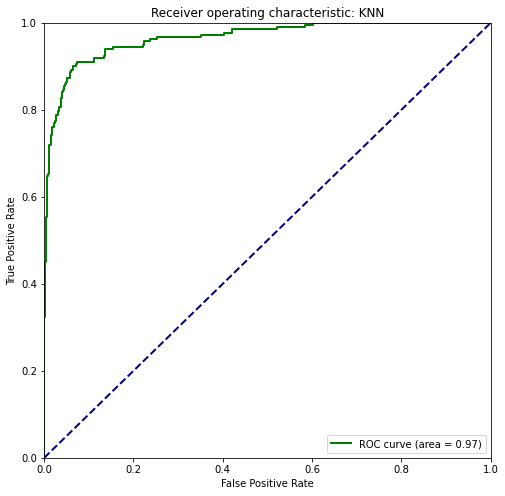

In [74]:
pred_prob_knn_imp = knn_model_imp.predict_proba(X_imp_test)[:,1]

fpr_knn1, tpr_knn1, _ = metrics.roc_curve(y_test, pred_prob_knn_imp)
roc_auc_knn1 = metrics.auc(fpr_knn1, tpr_knn1)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_knn1, tpr_knn1, color='green', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_knn1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: KNN')
plt.legend(loc = "lower right")
plt.show()

### 4. SVM

In [75]:
cv = KFold(n_splits = 10)

svm_model_imp = SVC(kernel='rbf', probability=True, random_state=50)

svm_model_imp.fit(X_imp_train, ytrain_rus)
score_svm_imp = cross_val_score(svm_model_imp, X_imp_train, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_svm_imp))

Mean: 0.884


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1110
           1       0.56      0.77      0.65       213

    accuracy                           0.87      1323
   macro avg       0.76      0.83      0.78      1323
weighted avg       0.89      0.87      0.87      1323



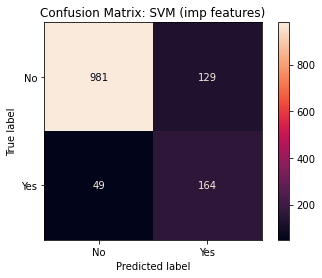

In [76]:
y_pred_svm_imp = svm_model_imp.predict(X_imp_test)

ac = accuracy_score(y_test, y_pred_svm_imp)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_svm_imp))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(svm_model_imp, X_imp_test, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: SVM (imp features)')
plt.show()

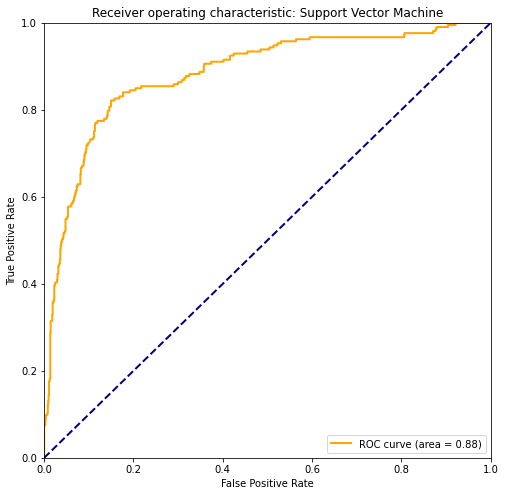

In [77]:
pred_prob_svm_imp = svm_model_imp.predict_proba(X_imp_test)[:,1]

fpr_svm1, tpr_svm1, _ = metrics.roc_curve(y_test, pred_prob_svm_imp)
roc_auc_svm1 = metrics.auc(fpr_svm1, tpr_svm1)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_svm1, tpr_svm1, color='orange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_svm1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Support Vector Machine')
plt.legend(loc = "lower right")
plt.show()

### 5. Naive Bayes

In [78]:
cv = KFold(n_splits = 10)

nb_model_imp = GaussianNB(var_smoothing=2.848035868435799e-08)

nb_model_imp.fit(X_imp_train, ytrain_rus)
score_nb_imp = cross_val_score(nb_model_imp, X_imp_train, ytrain_rus, cv=cv,  n_jobs=-1)
print('Mean: %.3f' % np.mean(score_nb_imp))

Mean: 0.691


Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1110
           1       0.30      0.73      0.42       213

    accuracy                           0.68      1323
   macro avg       0.61      0.70      0.60      1323
weighted avg       0.83      0.68      0.72      1323



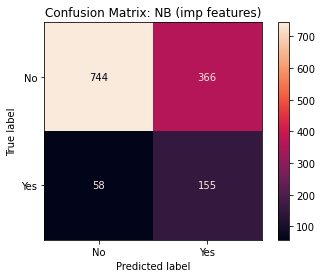

In [79]:
y_pred_nb_imp = nb_model_imp.predict(X_imp_test)

ac = accuracy_score(y_test, y_pred_nb_imp)
print(f'Accuracy: {ac:.2f}')
print(classification_report(y_test, y_pred_nb_imp))

cmap = sns.color_palette("rocket", as_cmap=True)
metrics.plot_confusion_matrix(nb_model_imp, X_imp_test, y_test, display_labels=['No', 'Yes'], cmap=cmap, values_format='d')
plt.title('Confusion Matrix: NB (imp features)')
plt.show()

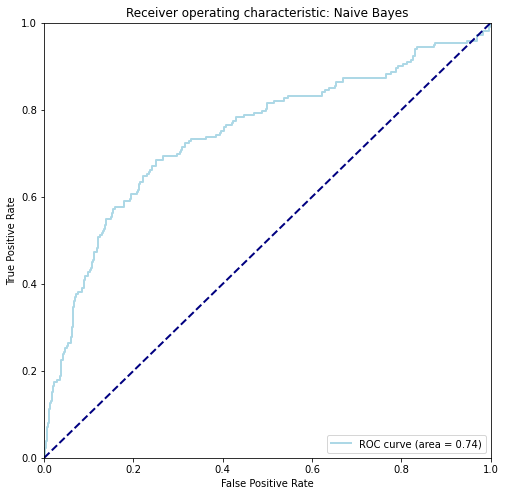

In [80]:
pred_prob_nb_imp = nb_model_imp.predict_proba(X_imp_test)[:,1]

fpr_nb1, tpr_nb1, _ = metrics.roc_curve(y_test, pred_prob_nb_imp)
roc_auc_nb1 = metrics.auc(fpr_nb1, tpr_nb1)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_nb1, tpr_nb1, color='lightblue', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_nb1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Naive Bayes')
plt.legend(loc = "lower right")
plt.show()

## ROC curve
### All features

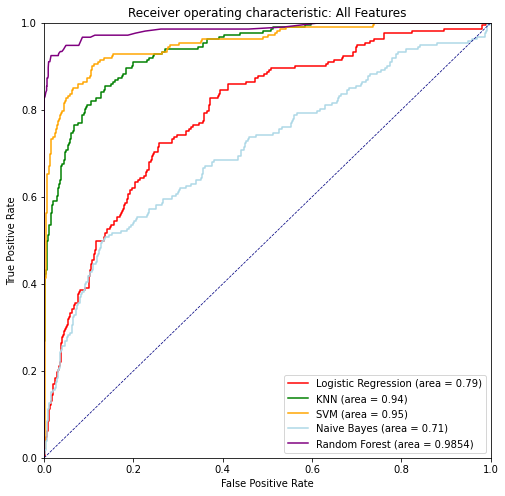

In [85]:
pred_prob_lr = lr_model.predict_proba(Xtest_rs)[:,1]
pred_prob_knn = knn_model.predict_proba(Xtest_rs)[:,1]
pred_prob_svm = svm_model.predict_proba(Xtest_rs)[:,1]
pred_prob_nb = nb_model.predict_proba(Xtest_rs)[:,1]
pred_prob_rf = rf_model.predict_proba(Xtest_rs)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, pred_prob_lr)
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, pred_prob_knn)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, pred_prob_svm)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, pred_prob_nb)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, pred_prob_rf)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,8))
lw = 1.5
lw_d = 0.75

plt.plot(fpr, tpr, color='red', lw = lw, label = 'Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot(fpr_knn, tpr_knn, color='green', lw = lw, label = 'KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='orange', lw = lw, label = 'SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='lightblue', lw = lw, label = 'Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='purple', lw = lw, label = 'Random Forest (area = %0.4f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw_d, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: All Features')
plt.legend(loc = "lower right")
plt.show()

### Important Features

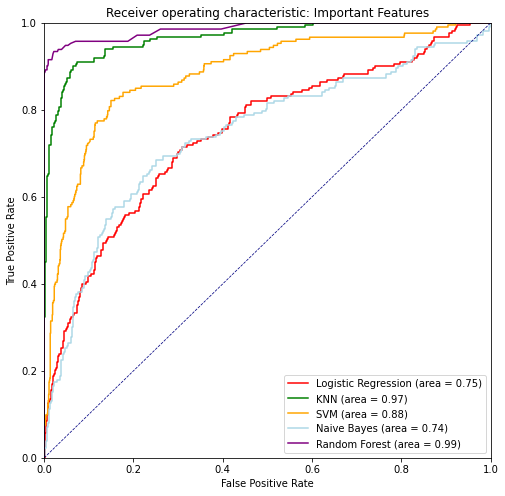

In [87]:
pred_prob_lr_imp = lr_model_imp.predict_proba(X_imp_test)[:,1]
pred_prob_knn_imp = knn_model_imp.predict_proba(X_imp_test)[:,1]
pred_prob_svm_imp = svm_model_imp.predict_proba(X_imp_test)[:,1]
pred_prob_nb_imp = nb_model_imp.predict_proba(X_imp_test)[:,1]
pred_prob_rf_imp = rf_model_imp.predict_proba(X_imp_test)[:,1]

fpr1, tpr1, _ = metrics.roc_curve(y_test, pred_prob_lr_imp)
fpr_knn1, tpr_knn1, _ = metrics.roc_curve(y_test, pred_prob_knn_imp)
fpr_svm1, tpr_svm1, _ = metrics.roc_curve(y_test, pred_prob_svm_imp)
fpr_nb1, tpr_nb1, _ = metrics.roc_curve(y_test, pred_prob_nb_imp)
fpr_rf1, tpr_rf1, _ = metrics.roc_curve(y_test, pred_prob_rf_imp)

roc_auc_lr1 = metrics.auc(fpr1, tpr1)
roc_auc_knn1 = metrics.auc(fpr_knn1, tpr_knn1)
roc_auc_svm1 = metrics.auc(fpr_svm1, tpr_svm1)
roc_auc_nb1 = metrics.auc(fpr_nb1, tpr_nb1)
roc_auc_rf1 = metrics.auc(fpr_rf1, tpr_rf1)

plt.figure(figsize=(8,8))
lw = 1.5
lw_d = 0.75

plt.plot(fpr1, tpr1, color='red', lw = lw, label = 'Logistic Regression (area = %0.2f)' % roc_auc_lr1)
plt.plot(fpr_knn1, tpr_knn1, color='green', lw = lw, label = 'KNN (area = %0.2f)' % roc_auc_knn1)
plt.plot(fpr_svm1, tpr_svm1, color='orange', lw = lw, label = 'SVM (area = %0.2f)' % roc_auc_svm1)
plt.plot(fpr_nb1, tpr_nb1, color='lightblue', lw = lw, label = 'Naive Bayes (area = %0.2f)' % roc_auc_nb1)
plt.plot(fpr_rf1, tpr_rf1, color='purple', lw = lw, label = 'Random Forest (area = %0.2f)' % roc_auc_rf1)

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw_d, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Important Features')
plt.legend(loc = "lower right")
plt.show()